<a href="https://colab.research.google.com/github/Zahraa-Albahrani/ST_Project_final/blob/main/scs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>
King Faisal University <br>
College of Computer Sciences and Information Technology <br>

<strong>
<center>Names of students:
<br>
<center>Zahraa Albahrani 220023993
<center>Raihana Jawad 220016140
<br>
<center>Section: 61
<br><br>
</strong>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to load and preprocess data
def load_data(file_path, date_col, target_col):
    """Loads and preprocesses the dataset."""
    data = pd.read_csv(file_path)
    data[date_col] = pd.to_datetime(data[date_col])
    data.set_index(date_col, inplace=True)
    return data[target_col]

In [ ]:
# Function to split data into training and testing sets
def split_data(series, train_ratio=0.8):
    """Splits the series into training and testing sets."""
    train_size = int(len(series) * train_ratio)
    train = series[:train_size]
    test = series[train_size:]
    return train, test


In [ ]:
# Function to evaluate model performance
def evaluate_model(test, predictions):
    """Calculates and returns evaluation metrics."""
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [ ]:
# Function to visualize the results
def visualize_results(train, test, predictions, model_name):
    """Plots the actual vs predicted values."""
    plt.figure(figsize=(14, 7))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Testing Data')
    plt.plot(test.index, predictions, label=f'{model_name} Predictions', linestyle='--')
    plt.legend()
    plt.title(f"{model_name} - Energy Time Series Forecasting")
    plt.xlabel("Date")
    plt.ylabel("Energy Consumption")
    plt.show()


In [ ]:
# Function to train and forecast using ARIMA
def arima_forecasting(train, test, order=(5, 1, 0)):
    """Trains an ARIMA model and forecasts."""
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))
    return predictions

In [ ]:

# Function to train and forecast using SVR
def svr_forecasting(train, test):
    """Trains an SVR model and forecasts."""
    # Scale data
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))
    test_scaled = scaler.transform(np.array(test).reshape(-1, 1))

    # Train SVR
    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr_model.fit(np.arange(len(train_scaled)).reshape(-1, 1), train_scaled.ravel())

    # Forecast
    predictions_scaled = svr_model.predict(np.arange(len(train_scaled), len(train_scaled) + len(test_scaled)).reshape(-1, 1))
    predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()
    return predictions

In [ ]:
# Neural Network Model (MLP)
def nn_forecasting(train, test, epochs=50, batch_size=32):
    """Trains a Neural Network model and forecasts."""
    # Scale data
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))
    test_scaled = scaler.transform(np.array(test).reshape(-1, 1))

    # Prepare input-output pairs for supervised learning
    X_train, y_train = [], []
    look_back = 10  # Window size for input features
    for i in range(len(train_scaled) - look_back):
        X_train.append(train_scaled[i:i + look_back])
        y_train.append(train_scaled[i + look_back])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Build the neural network model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(look_back, 1)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Forecast
    predictions_scaled = []
    input_seq = train_scaled[-look_back:].reshape(1, -1, 1)
    for _ in range(len(test_scaled)):
        prediction = model.predict(input_seq, verbose=0)
        predictions_scaled.append(prediction[0, 0])
        input_seq = np.append(input_seq[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    predictions = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1)).ravel()
    return predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA - MAE: 16655.70, MSE: 344781477.17, RMSE: 18568.29
SVR - MAE: 6954.86, MSE: 75108106.14, RMSE: 8666.49


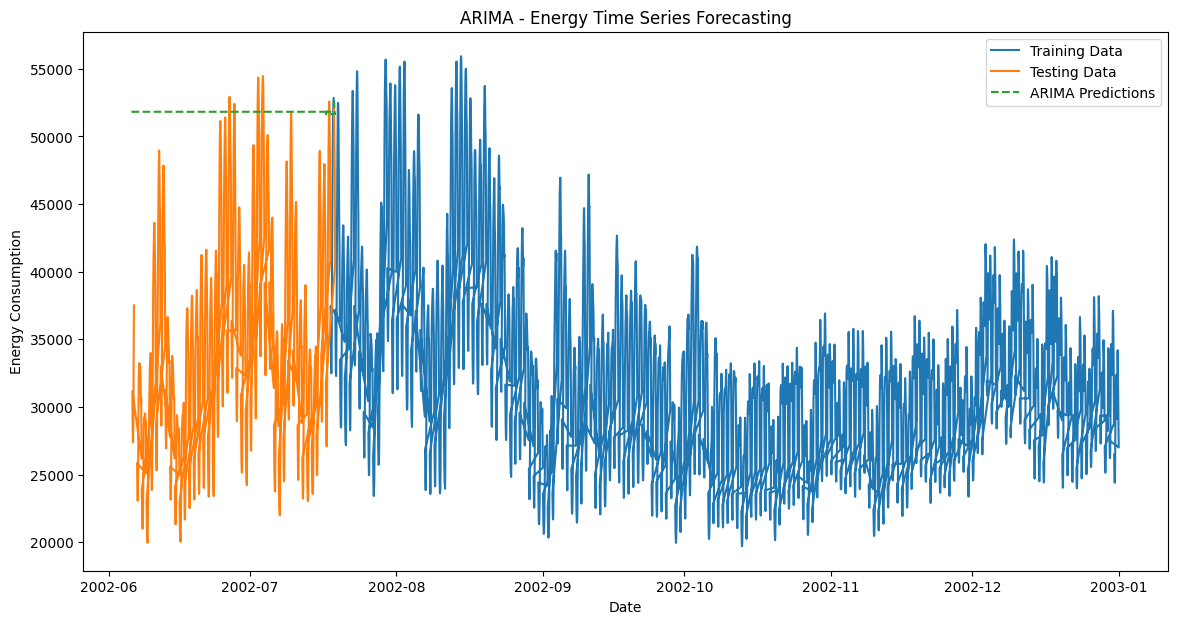

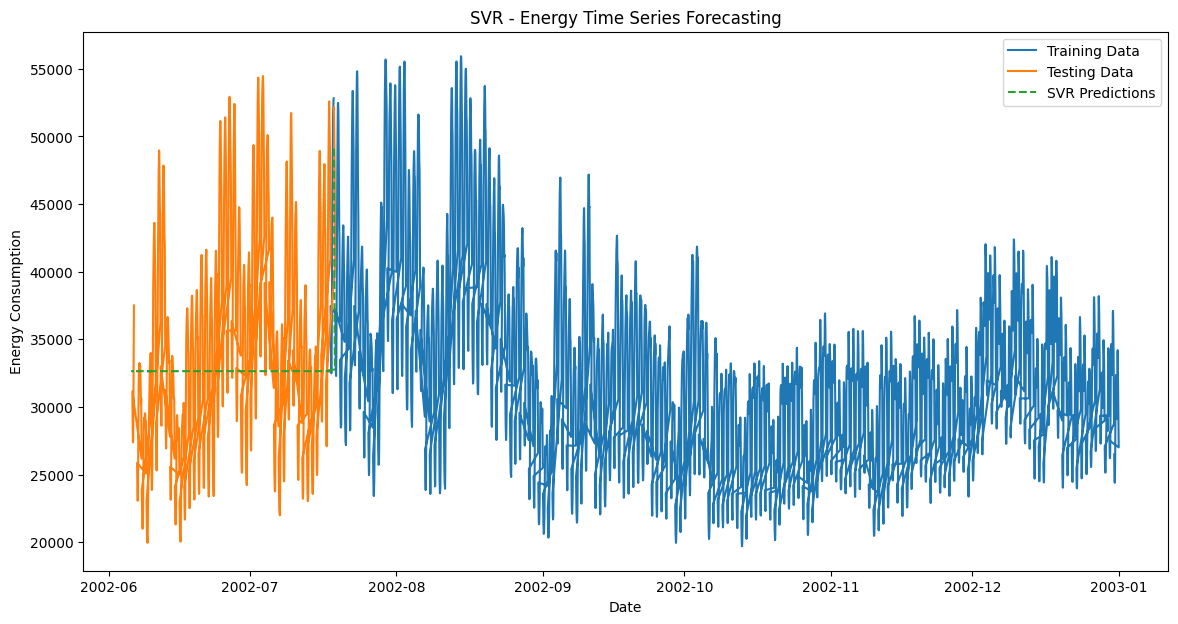

In [ ]:
if __name__ == "__main__":
    # Load the data using the correct column names
    energy_series = load_data('energy_data.csv', 'Datetime', 'PJME_MW')

    # Reduce the dataset size for testing
    energy_series = energy_series[:5000]  # Use only the first 1000 rows for testing

    # Split the data into training and testing sets
    train, test = split_data(energy_series)

    # ARIMA model
    arima_predictions = arima_forecasting(train, test)
    arima_mae, arima_mse, arima_rmse = evaluate_model(test, arima_predictions)
    print(f"ARIMA - MAE: {arima_mae:.2f}, MSE: {arima_mse:.2f}, RMSE: {arima_rmse:.2f}")

    # SVR model
    svr_predictions = svr_forecasting(train, test)
    svr_mae, svr_mse, svr_rmse = evaluate_model(test, svr_predictions)
    print(f"SVR - MAE: {svr_mae:.2f}, MSE: {svr_mse:.2f}, RMSE: {svr_rmse:.2f}")

    # Visualizing results
    visualize_results(train, test, arima_predictions, "ARIMA")
    visualize_results(train, test, svr_predictions, "SVR")
